In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import pandas as pd
import seaborn as sns
sns.set()

import plotly.express as px

In [2]:
df = pd.read_csv("http://media.sundog-soft.com/SelfDriving/FuelEfficiency.csv")

In [3]:
df.head()

,Mfr Name,Carline,Eng Displ,Cylinders,Transmission,CityMPG,HwyMPG,CombMPG,# Gears
0,aston martin,Vantage V8,4.0,8,Auto(S8),18,25,21,8
1,Volkswagen Group of,Chiron,8.0,16,Auto(AM-S7),9,14,11,7
2,General Motors,CORVETTE,6.2,8,Auto(S8),12,20,15,8
3,General Motors,CORVETTE,6.2,8,Auto(S8),15,25,18,8
4,General Motors,CORVETTE,6.2,8,Auto(S8),14,23,17,8


* Mfr Name : Manufacturer Name
* Carline : Model
* Eng displacement : Engine displacement is the swept volume of pistons inside the cylinders. Displacement has an impact on increasing car power or fuel efficiency.
* Cylinders : # of Cylinders
* Transmission: Transmission
* CityMPG : It's the verage MPG of a car in the city. Since city driving tends to mean rougher roads and frequent stopping and starting, this number tends to be the lowest of the three. The car’s engine has to work harder in the city because of city traffic and navigation, and doing so takes extra work and therefore extra gas.
* HwyMPG : is the average MPG for the car on the highway. Even though we’ll be driving faster and often for longer stretches of time, highways are smoother than city roads and keep the engine running at consistent levels, which requires less gas. If we’re looking at used cars and find a newer model with high mileage, it’s a good bet that it was driven mostly on the highway and that the engine’s in good shape.
* CombMPG : a combination of the city and highway numbers
* Gears : Number of Gears each car has

In commercials and advertisements for cars we often see `MPG, or miles per gallon`, featured prominently. Most of us know that a higher MPG is more desirable because it equates to less visits at the gas station. But what does that number really mean?

Essentially, MPG tells you how many miles your car can travel on a single gallon of gas. If, for example, your car gets 34 miles per gallon, then traveling 34 miles should consume exactly one gallon of gas.

We usually see two different figures -- city MPG and highway MPG. These figures are determined by the federal Environmental Protection Agency, which rates the fuel economies of new cars after rigorous testing on a dynamometer. City MPG refers to driving with occasional stopping and braking, simulating the conditions you're likely to run into while driving on city streets. Highway MPG is based on more continuous acceleration, which usually yields a higher figure because it's a more efficient use of the engine.

source : https://auto.howstuffworks.com/under-the-hood/cost-of-car-ownership/calculate-fuel-cost1.htm

In [4]:
gear_counts = df['# Gears'].value_counts()

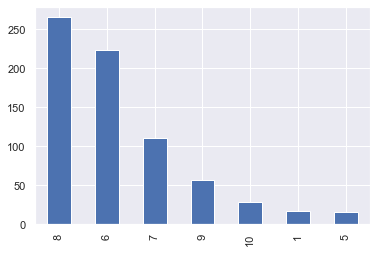

In [6]:
gear_counts.plot(kind= 'bar');

Seaborn includes many types of plots that matplotlib doesn't offer. For example, "displot" can be used to plot a histogram together with a smooth distribution of that histogram overlaid on it. Let's plot the distribution of MPG values on the vehicles in this database as an example:


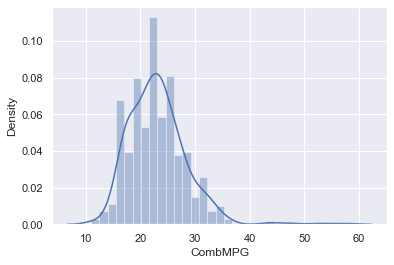

In [8]:
sns.distplot(df["CombMPG"]);

Above we have a histogram of how many time eahc combine MPG appears in the data set. We can see that we have a peak just after 20 and also with the dist plot we can directly observe a general trend in the data. We can observe kind of weird in between some values.

Something we encouter pretty often is a pair plot from Seaborn. This help us visualize plots of every combination of various attributes together, so we can look for intersting patterns between fetaures and dig deeper into it.

As an example, let's classify cars by how many cylinders they have, and we look for relationships between how many cylinders each car has and their city MPG rating, their Highway MPG rating, and their combined MPG rating.

In [9]:
fig = px.scatter_matrix(df,
    dimensions=['Cylinders', 'CityMPG', 'HwyMPG', 'CombMPG'],
    color="Cylinders", 
    title="Scatter matrix of iris data set",
    labels={col:col.replace('_', ' ') for col in df.columns}) # remove underscore
fig.update_traces(diagonal_visible=False)
fig.show()

By studying the results above, we can see there is a relationship between number of cylinders and MPG: when the cylinders increase, the MPGs decrase, but MPG for 4-cylinder vehicles ranges really widely. There also appears to be a good linear relationship between the differnt ways of measureing MPG values, until we get into the higher MPG ratings.

Scatter Plot

In [10]:
fig = px.scatter(df, x="Eng Displ", y="CombMPG")
fig.show()

As we can see there is a clear relationship here, the bigger the combMPG, the worse is the fuel effiency which not suprising at all.

Join plot

It combines a scatterplot with histograms on both axes. This lets us visualize both the individual data points and the distribution accross both dimensions at the same time.


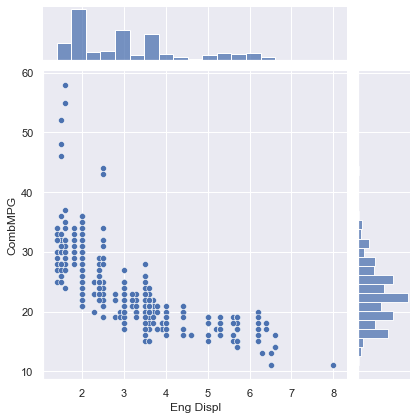

In [13]:
sns.jointplot(x="Eng Displ", y="CombMPG", data=df);

This figure above beyond showing us the relationsgip between the two variables, it also tells us that the most common Eng Displ is around 2 liters.


Lmplot 

It's a scatterplot but with a linear regression line computed and overlaid onto the data.

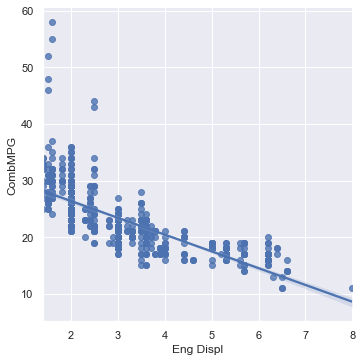

In [15]:
sns.lmplot(x="Eng Displ", y="CombMPG", data=df);

Looking closer, we can see a shaded erea. It is the confidence interval of the regression estimates.

ci int in 0, 100 or None, optional Size of the confidence interval for the regression estimate. This will be drawn using translucent bands around the regression line. The confidence interval is estimated using a bootstrap; for large datasets, it may be advisable to avoid that computation by setting this parameter to None.

source: https://stackoverflow.com/questions/61522386/sns-regplot-shows-a-shaded-area-for-the-regression-which-does-not-make-sense

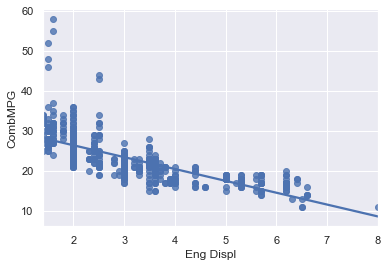

In [16]:
sns.regplot(x="Eng Displ", y="CombMPG", data=df,ci=None);

Next, let's look at a `blox plot`. This is what's called a `box and whiskers` plot, which is useful for visualizing typical values for a given category without getting distracted by outliers. Each box represents the range between the first and third quartiles of the data, with a line representing the median value. The `whiskers` that extend from the box represents the spread of the remainder of the data, apart from clear outliers that are plotted as individual points outside of the whiskers.

As an example, let's look at box plot for each vehicle manufacturer, visualizing the miles-per-gallon ratings across the vehicles they produce. This lets us look at the spread of MPG ratings across all the vehicles each manufacturer offers.

There are a lot of manufacturers, so to make the resulting graph readable, we'll increase Seaborn's default figure size, and also use set_xticklabels to rotate the labels 45 degrees.


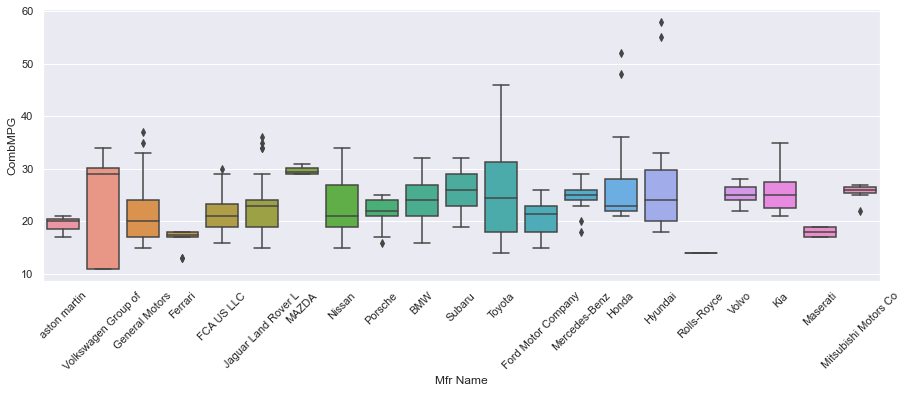

In [17]:
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.boxplot(x='Mfr Name', y='CombMPG', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

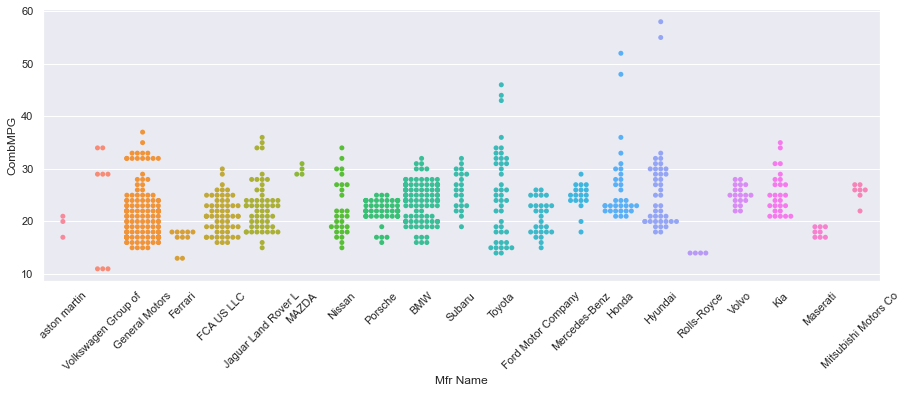

In [18]:
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.swarmplot(x='Mfr Name', y='CombMPG', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

Count plot 

It's basically the same as a histogram, but for categorical data. It lets you count up how many times each given category on the X axis occurs in our data, and plot it. 

As an example, we can see that General Motors offers more vehicle model than anyone else, with BMW not far behind.

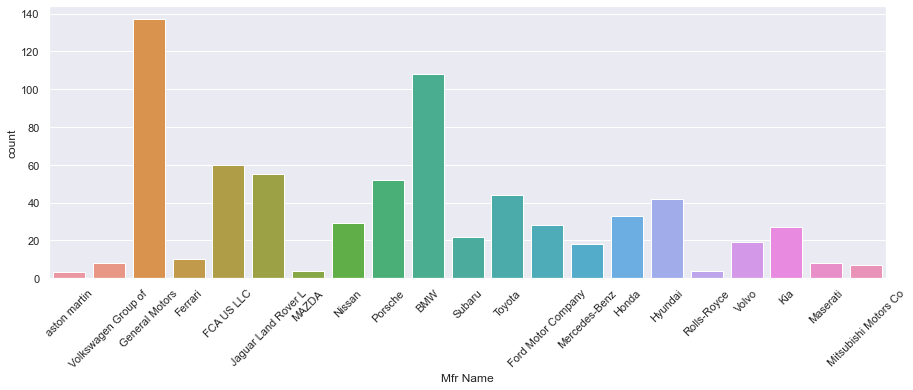

In [19]:
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.countplot(x='Mfr Name',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

Heat-Map:

It allows us to plot tabular, 2D data of some sort, with colors representing the individual values in each cell of the 2D table.

In this example, we'll create a pivot table from our original dataframe, to create a 2D table that contains the average MPG ratings for every combination of number of cylinders and engine displacement.

The resulting heatmap shows all the engine displacement values along the X axis, and all of the cylinder values along the Y axis. For each cell of the table, the actual average MPG rating for that combination of cylinders and engine displacement is represented not as a number, but as a color that ranges from dark for small values, and light for large values.

And, this does allow us visualize a clear trend where things get progressively darker as we move from the top-left of the graph to the bottom-right. Which make sense; higher MPG ratings are associated with lower number of cylinders, and lower engine displacement values. By teh time we get to an 8-liter 16-cylinder engine, the average MPG is at ist worst of about 12, represented by the color black.

This particular graph has a lot of missing data, but the heatmap deals with that gracefully. A 3-cylinder 8-liter engine simply does not exist!

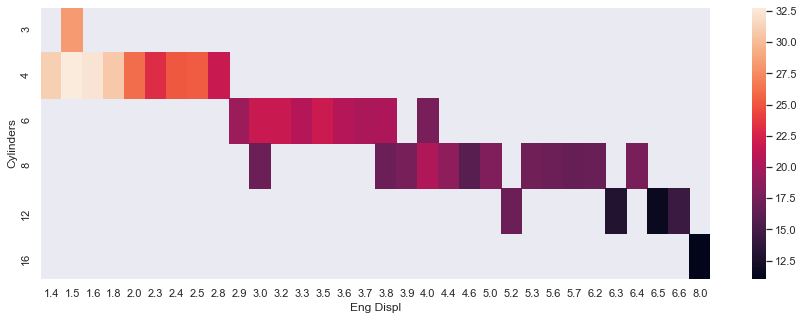

In [20]:
df2 = df.pivot_table(index='Cylinders', columns='Eng Displ', values='CombMPG', aggfunc='mean')
sns.heatmap(df2);

Explore the relationship between the number of gears a car has, and its combined MPG rating.

In [21]:
fig = px.scatter(df, x="# Gears", y="CombMPG")
fig.show();

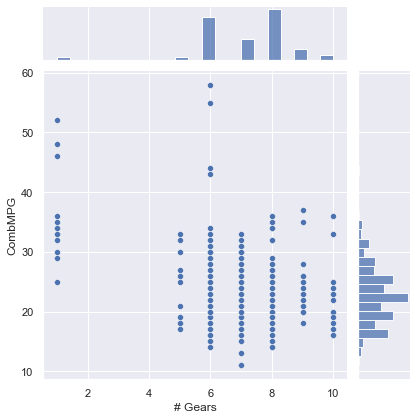

In [22]:
sns.jointplot(x="# Gears", y="CombMPG", data=df);

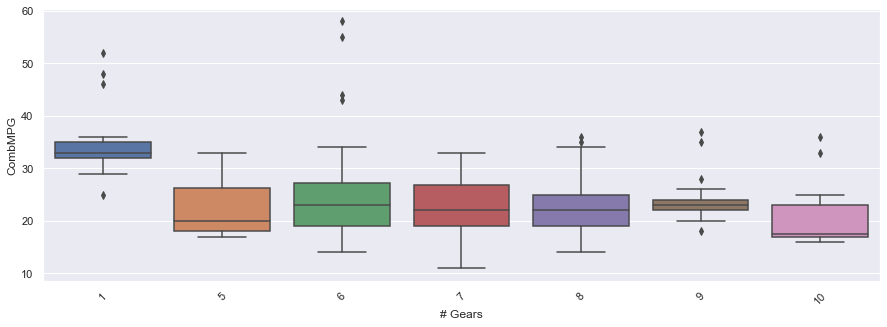

In [23]:
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.boxplot(x='# Gears', y='CombMPG', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

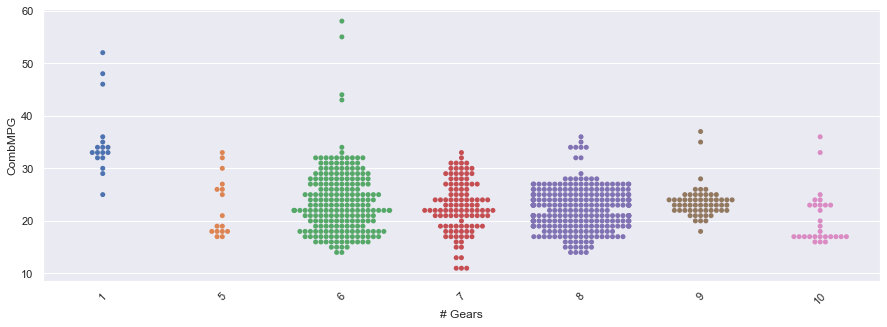

In [24]:
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.swarmplot(x='# Gears', y='CombMPG', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [25]:
def save_df(df,folder_path ,name):
    full_path = folder_path + name + '.csv'
    df.to_csv(full_path, index = False, header=True)